## Business Case
Bank GoodCredit wants to predict cred score for current credit card
customers. The cred score will denote a customer’s credit worthiness
and help the bank in reducing credit default risk.

## Dataset Attributes 
Target variable → Bad_label

* 0 – Customer has Good credit history
* 1 – Customer has Bad credit history (falls into 30 DPD + bucket)
  
This data has three tables and each tables has there own columns :-

* Cust_Account
* Cust_Enquiry
* Cust_Demographics


## Domain Analysis
Bank credit analysis involves verifying and determining the creditworthiness of a potential client by looking at their financial state, credit reports, and business cash flows.The goal of credit analysis is to determine the level of default risk that a client presents to the company and the losses that the bank will suffer if the client defaults.The risk level that a client presents determines whether the bank will approve or reject the loan application, and if approved, the amount to be awarded.some of the major table this data has and every tables has there own important columns which are Customers Account, Customers Demographics and Customers Enquiry.

* Cust_Account :- This table contains customer’s historical accounts data and payments history.

* Cust_Demographics :- Current customer applications with demographic data

* Cust_Enquiry :- This table contains customer’s historical enquiry data such as enquiry
amount and enquiry purpose.

**Note** that demographics features are renamed as features and obscured in accordance with privacy policies.

* I will explain every necesseary columns when i'll do **Data Cleaning**.

## Dataset Fields
For getting a Dataset we have to install pymysql and mysql connector and the help of mysql i'm going to load dataset and convert into csv file then i'm going to work on this project.

## Python Implementation 

In [6]:
import os                 # Handles current working directory
import mysql.connector    # for making connection to database
import pandas as pd      # for analyzing, exploring, cleaning and manipualting data
import numpy as np       # for working with mathematical part/ numerical part

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
# making connection to database available on server
connection = mysql.connector.connect(host = "18.136.157.135",
                                    user = 'dm_team1',
                                    password = "DM!$Team&279@20!")

In [8]:
# Check the number of database available on server
cursor = connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_banking',)


In [9]:
# connecting the database 
connection = mysql.connector.connect(host = "18.136.157.135",
                                    user = 'dm_team1',
                                    password = "DM!$Team&279@20!",
                                    database = 'project_banking')

In [10]:
# getting all tables of BankGoodCredit
db_tables = pd.read_sql_query('show tables', connection)
print(db_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


In [11]:
# put "Cust_Account" in variable 
Cust_Account = pd.read_sql_query("SELECT * FROM Cust_Account", connection)

In [12]:
# put "Cust_Demographics" in variable
Cust_Demographics = pd.read_sql_query("SELECT * FROM Cust_Demographics", connection)

In [13]:
# put "Cust_Enquiry" in variable
Cust_Enquiry = pd.read_sql_query("SELECT * FROM Cust_Enquiry", connection)

* Don't need Customers enquriy for traing model so we are skip the tables
* we skip this tables because customers enquiry tables nevers contribute for checking credit score 

In [15]:
# run a code for showing all columns 
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows', None)

In [16]:
# This table contains customer's historic accounts data and payment history
Cust_Account

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,24228,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,0,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,0,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,0,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,


In [17]:
# This contains Current customer applications with demographic data
Cust_Demographics

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,,,,Y,PD1,PD3,12,SA05,MA01,,,1,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,,PAN Card,CUQPSXXXXX,,,Y,State Bank of India,99000,01-Jan-15,17-Jun-16,1,10,Y,N,Y,N,,Y,1988-10,10,157,110045,0,1,33000,0-0,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,,,,Y,PD1,PD3,12,SA03,AS33,,,1,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,@GMAIL.COM,PAN Card,DTPPSXXXXX,,,N,,0,,17-Jun-16,1,10,N,N,Y,N,,Y,2014-12,33,102,282001,1,1,1,0-0,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card 

In [18]:
# This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.
Cust_Enquiry

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000


In [19]:
# here i'm going to merge "Cust_Account" and "Cust_Demographics" and making one dataset using INNER JOIN
data = pd.merge(Cust_Account, Cust_Demographics, on = 'customer_no', how = 'inner')

In [20]:
# Dataset after merging 
data

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,,,,Y,PD1,PD3,12,SA35,S001,,,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indian Bank,,N,,0,,17-Jun-16,1,13,,N,Y,N,,Y,2009-0,13,39,121003,0,1,100000,0-0,13,R,,,0000-00-00,0,XXXXX,1,N,1
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,,,,Y,PD1,PD3,12,SA35,S001,,,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indi

In [21]:
# Save merged datset
data.to_csv("Bank_GoodCredits", index= False)

In [22]:
# Data is in csv file so we have to call pd.read_csv using pandas
data = pd.read_csv("Bank_GoodCredits")

In [23]:
data

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA05,MA01,NaN,NaN,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,NaN,PAN Card,ASWPKXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,NaN,03-Oct-15,16201.0,10390,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000.0,1400.0,NaN,3.0,5603.0,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA05,MA01,NaN,NaN,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,NaN,PAN Card,ASWPKXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,NaN,30-Sep-15,41028.0,34420,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,NaN,NaN,NaN,NaN,NaN,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA05,MA01,NaN,NaN,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,NaN,PAN Card,ASWPKXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,0,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687.0,3.0,Card Setup,14.0,125000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA35,S001,NaN,NaN,1.0,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,0.0,Faridabad,121003.0,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indian Bank,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,N,Y,N,NaN,Y,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,0-0,13.0,R,NaN,NaN,0000-00

## BAsic Checks :-

In [25]:
data.info()    # information of each and every row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Columns: 103 entries, dt_opened_x to Bad_label
dtypes: float64(38), int64(5), object(60)
memory usage: 146.4+ MB


In [26]:
data.describe()   # statistical informstion

,customer_no,acct_type,owner_indic,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,paymentfrequency,actualpaymentamount,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_49,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_74,feature_76,feature_78,Bad_label
count,186329.000000,186329.000000,186329.000000,1.774540e+05,1.863290e+05,8.760000e+02,4.885200e+04,35282.000000,63893.000000,4.105300e+04,165928.000000,186196.000000,186196.0,1.861960e+05,124941.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,1.861960e+05,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,9.230000e+02,1.861960e+05,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,1.861960e+05,186196.000000,197.000000,186196.000000,186196.000000,186329.000000
mean,11431.820447,8.403104,1.122128,1.756104e+05,7.640269e+04,2.583151e+04,7.552881e+04,20608.503401,2.996212,3.016616e+04,725.253929,2.317542,14.0,1.342736e+05,7.516028,1.039389,1.158897,0.854078,243023.732948,2000.282283,0.602790,1.282111,3.857880e+04,1445.992588,3.108456,5.966541,0.109755,246347.662506,2.779537e+11,8.348658e+04,1.070367,13.377924,14.250644,142.715445,275105.859116,0.137613,1.282111,3.857880e+04,14.281789,2.269036,0.005467,1.040860,0.035491
std,6730.432139,5.179466,0.567040,9.842643e+05,6.186783e+05,2.030680e+05,7.174109e+04,24856.481410,0.086954,3.870822e+05,37.150723,0.902129,0.0,9.177263e+04,5.805336,0.194518,0.365581,1.172739,171155.578951,12.698325,2.252566,0.453737,1.028723e+05,902.719609,3.559898,4.485362,0.786971,168705.840748,9.853658e+10,1.259489e+05,0.359427,8.519329,9.373645,179.549688,196264.878936,0.344494,0.453737,1.028723e+05,9.094427,0.498677,0.097677,0.220138,0.185018
min,1.000000,0.000000,1.000000,1.000000e+00,-7.355205e+06,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,-1.000000,1.000000,14.0,0.000000e+00,0.000000,1.000000,1.000000,0.000000,110001.000000,1964.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,7.568570e+05,0.000000e+00,1.000000,2.000000,2.000000,1.000000,110001.000000,0.000000,1.000000,1.000000e+00,2.000000,2.000000,0.000000,1.000000,0.000000
25%,5879.000000,6.000000,1.000000,2.297500e+04,0.000000e+00,1.535000e+02,3.100000e+04,7500.000000,3.000000,3.110000e+03,699.000000,1.000000,14.0,8.000000e+04,0.000000,1.000000,1.000000,0.000000,110056.000000,1990.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,110051.000000,3.090000e+11,0.000000e+00,1.000000,10.000000,10.000000,15.000000,110059.000000,0.000000,1.000000,1.000000e+00,10.000000,2.000000,0.000000,1.000000,0.000000
50%,11169.000000,10.000000,1.000000,4.522350e+04,0.000000e+00,1.209500e+03,6.000000e+04,12500.000000,3.000000,7.590000e+03,724.000000,3.000000,14.0,1.140000e+05,12.000000,1.000000,1.000000,0.000000,121004.000000,2005.000000,0.000000,1.000000,3.500000e+04,2008.000000,1.000000,7.000000,0.000000,122002.000000,3.090000e+11,5.500000e+04,1.000000,10.000000,10.000000,157.000000,201001.000000,0.000000,1.000000,3.500000e+04,10.000000,2.000000,0.000000,1.000000,0.000000
75%,16982.000000,10.000000,1.000000,1.060000e+05,2.099800e+04,7.663250e+03,1.000000e+05,27000.000000,3.000000,1.800000e+04,748.000000,3.000000,14.0,1.510000e+05,12.000000,1.000000,1.000000,2.000000,400090.000000,2011.000000,0.000000,2.000000,5.000000e+04,2012.000000,6.000000,11.000000,0.000000,400064.000000,3.090000e+11,1.130000e+05,1.000000,17.000000,21.000000,157.000000,411028.000000,0.000000,2.000000,5.000000e+04,21.000000,2.000000,0.000000,1.000000,0.000000
max,23896.000000,59.000000,4.000000,1.800000e+08,1.360100e+08,4.869309e+06,2.500000e+06,1000000.000000,3.000000,6.785322e+07,896.000000,3.000000,14.0,1.217000e+06,12.0

In [27]:
data.describe(include='O')   # statistical information for categorical features

,dt_opened_x,upload_dt,opened_dt,last_paymt_dt,closed_dt,reporting_dt,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,rateofinterest,dt_opened_y,entry_time,feature_1,feature_2,feature_5,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_15,feature_16,feature_17,feature_18,feature_20,feature_21,feature_22,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_38,feature_43,feature_45,feature_46,feature_47,feature_48,feature_50,feature_51,feature_53,feature_54,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_70,feature_72,feature_73,feature_75,feature_77,feature_79
count,186329,186329,185874,160842,77254,186329,186329,78505,186328,186328,24833.0,186329,186196,186196,165928,186196,10117,10117,3.710000e+02,186196,186196,78255,186117,186070,10004,208.0,186329,186196,186329,186196,180805,156093,186196,186196,186196,133980,133980,133980,186196,83136,185389,186329,45343,186196,103126,102286,186196,17237,186196,186196,186196,112,186196,186196,186196,186196,21570,186196,186329,186196
unique,197,75,6245,4510,4839,1877,18311,11911,233,234,1711.0,197,296,7,281,1,19,19,7.000000e+00,2,16,14,364,522,364,13.0,10610,8462,3251,2,721,10,62,5,2,9,11,5663,70,4472,5,11250,56,2,10,180,1,2,2,2,2,8,2,491,133,2,2,62,3124,2
top,16-Nov-15,21-Apr-15,13-Apr-12,05-Mar-15,05-Mar-12,31-Jul-15,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Jul-15,01-Jan-15,39.0,16-Nov-15,23-Oct-15,Platinum Maxima,19-Aug-15,Card Setup,ROTVR,Negative Office Tele Verification,3.090000e+11,Y,PM1,PD3,SA03,AS03,5622,180.0,AAIPKXXXXX,01-Jan-86,98100XXXXX,N,@GMAIL.COM,Graduate,New Delhi,Self,Y,Private Ltd. Co.,Banking/Financial Services,MANAGER,New Delhi,@GMAIL.COM,PAN Card,XXXXX,HDFC Bank,Y,HDFC Bank,01-Jun-14,17-Jun-16,Y,N,Y,N,GNWX-B,Y,2010-0,0-0,R,Y,0000-00-00,XXXXX,N
freq,4643,5128,514,1739,353,12654,44979,18956,16747,5640,4120.0,4643,1478,76014,1347,186196,2562,2562,3.070000e+02,177801,74160,59088,68912,9382,1764,69.0,173,176,1672,164440,112409,110025,87577,92451,160573,61860,97943,13716,70243,14618,176024,940,11421,103897,43844,4807,186196,16043,182223,177801,183578,40,186161,12813,134163,130100,15145,185399,16349,186166


## Data Preprocessing :-
Handling missing values and drop those columns having more than 40% of missing values 

In [29]:
data.isnull().sum()

dt_opened_x      0
customer_no      0
upload_dt        0
acct_type        0
owner_indic      0
              ... 
feature_76     133
feature_77       0
feature_78     133
feature_79     133
Bad_label        0
Length: 103, dtype: int64

In [30]:
# here i'm running loop in which columns having >=40% of missing values and later drop those columns
df = []
for i in data.columns:
    if(data[i].isnull().sum())/len(data)*100>=40:
        df.append(i)

In [31]:
print(df)

['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18', 'feature_45', 'feature_48', 'feature_49', 'feature_51', 'feature_53', 'feature_57', 'feature_61', 'feature_73', 'feature_74']


In [32]:
print(len(df))

23


There are 23 columns having more than 40% of missing values 

In [34]:
# drop those 23 columns 
data.drop(['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 
           'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18', 'feature_45', 'feature_48', 
           'feature_49', 'feature_51', 'feature_53', 'feature_57', 'feature_61', 'feature_73', 'feature_74'], axis=1, inplace=True)

In [35]:
# Checking duplicate values 
data.duplicated().sum()

2438

In [36]:
# Drop this duplicate rows
data.drop_duplicates(inplace= True)

In [37]:
data

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymenthistory1,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_11,feature_12,feature_14,feature_15,feature_16,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_47,feature_50,feature_52,feature_54,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,30-Sep-15,20900.0,0,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",01-Sep-15,01-Jul-14,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,PAN Card,ASWPKXXXXX,N,0.0,17-Jun-16,1.0,10.0,N,Y,N,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0000-00-00,0.0,88009XXXXX,1.0,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,03-Oct-15,16201.0,10390,"""""""0000000000000000000000000000000000000000000...",01-Oct-15,01-Nov-12,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,PAN Card,ASWPKXXXXX,N,0.0,17-Jun-16,1.0,10.0,N,Y,N,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0000-00-00,0.0,88009XXXXX,1.0,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,30-Sep-15,41028.0,34420,"""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,PAN Card,ASWPKXXXXX,N,0.0,17-Jun-16,1.0,10.0,N,Y,N,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0000-00-00,0.0,88009XXXXX,1.0,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,31-Jan-09,93473.0,0,"""""""1200900600600600300000000000000000000000000...",01-Jul-07,01-Feb-06,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687.0,3.0,Card Setup,14.0,125000.0,Y,PD1,12.0,SA35,S001,1.0,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,0.0,Faridabad,121003.0,PAN Card,AHRPMXXXXX,N,0.0,17-Jun-16,1.0,13.0,N,Y,N,Y,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,0-0,13.0,R,0000-00-00,0.0,XXXXX,1.0,N,1
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,31-May-15,20250.0,13500,"""""""000000000000000""""""",01-May-15,01-Jan-15,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687.0,3.0,Card Setup,14.0,125000.0,Y,PD1,12.0,SA35,S001,1.0,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,0.0,Faridabad,121003.0,PAN Card,AHRPMXXXXX,N,0.0,17-Jun-16,1.0,13.0,N,Y,N,Y,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,0-0,13.0,R,0000-00-00,0.0,XXXXX,1.0,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [38]:
# now we're going to drop unnecessary columns 

data.drop(["reporting_dt","paymenthistory1","dt_opened_y","entry_time","feature_2","feature_20","feature_21",
          "feature_22","feature_24","feature_46","feature_47","feature_54","feature_75","feature_77","last_paymt_dt","paymt_str_dt","paymt_end_dt","feature_5","feature_6","feature_62","feature_70",
           "feature_79","feature_39","dt_opened_x","upload_dt"],axis=1,inplace=True)

In [39]:
data

,customer_no,acct_type,owner_indic,opened_dt,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_11,feature_12,feature_14,feature_15,feature_16,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_42,feature_43,feature_44,feature_50,feature_52,feature_55,feature_56,feature_58,feature_59,feature_60,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,Bad_label
0,12265,6,1,09-Jun-13,20900.0,0,Platinum Maxima,683.0,3.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,N,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,0.0,Gurgaon,122001.0,N,0.0,1.0,10.0,N,Y,N,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,R,0.0,1.0,1
1,12265,10,1,25-May-12,16201.0,10390,Platinum Maxima,683.0,3.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,N,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,0.0,Gurgaon,122001.0,N,0.0,1.0,10.0,N,Y,N,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,R,0.0,1.0,1
2,12265,10,1,22-Mar-12,41028.0,34420,Platinum Maxima,683.0,3.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,N,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,0.0,Gurgaon,122001.0,N,0.0,1.0,10.0,N,Y,N,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,R,0.0,1.0,1
3,15606,10,1,13-Jan-06,93473.0,0,Platinum Deligh,687.0,3.0,125000.0,Y,PD1,12.0,SA35,S001,1.0,N,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,0.0,Faridabad,121003.0,N,0.0,1.0,13.0,N,Y,N,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,13.0,R,0.0,1.0,1
4,15606,6,1,18-Jan-15,20250.0,13500,Platinum Deligh,687.0,3.0,125000.0,Y,PD1,12.0,SA35,S001,1.0,N,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,0.0,Faridabad,121003.0,N,0.0,1.0,13.0,N,Y,N,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,13.0,R,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,1,02-May-07,24228.0,24228,Titanium Deligh,746.0,3.0,138000.0,Y,TD1,0.0,BBOL,H004,1.0,N,1.0,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,0.0,Self,Y,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,0.0,Hyderabad,500003.0,N,0.0,1.0,2.0,N,Y,N,1995-0,2.0,14.0,500017.0,0.0,1.0,45800.0,2.0,R,0.0,1.0,0
186325,1611,10,1,11-Apr-07,19584.0,0,Titanium Deligh,746.0,3.0,138000.0,Y,TD1,0.0,BBOL,H004,1.0,N,1.0,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,0.0,Self,Y,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,0.0,Hyderabad,500003.0,N,0.0,1.0,2.0,N,Y,N,1995-0,2.0,14.0,500017.0,0.0,1.0,45800.0,2.0,R,0.0,1.0,0
186326,1611,10,1,20-Nov-06,50844.0,0,Titanium Deligh,746.0,3.0,138000.0,Y,TD1,0.0,BBOL,H004,1.0,N,1.0,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,0.0,Self,Y,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,0.0,Hyderabad,500003.0,N,0.0,1.0,2.0,N,Y,N,1995-0,2.0,14.0,500017.0,0.0,1.0,45800.0,2.0,R,0.0,1.0,0
186327,1611,10,1,17-Oct-06,35587.0,0,Titanium Deligh,746.0,3.0,138000.0,Y,TD1,0.0,BBOL,H004,1.0,N,1.0,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,0.0,Self,Y,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,0.0,Hyderabad,500003.0,N,0.0,1.0,2.0,N,Y,N,1995-0,2.0,14.0,500017.0,0.0,1.0,45800.0,2.0,R,0.0,1.0,0


In [40]:
# run a loop to get unique values in each column
for i in data.columns:
    print(f'============== {i} ==============\n')
    print(data[i].value_counts())

============== customer_no ==============

customer_no
8814     76
11922    71
8872     68
51       66
8770     64
         ..
1743      1
20507     1
20427     1
21944     1
17698     1
Name: count, Length: 23896, dtype: int64
============== acct_type ==============

acct_type
10    99092
6     25237
5     22629
1      9290
13     8478
2      5577
7      4161
0      3891
12     1188
32      735
51      719
3       665
15      492
17      405
8       404
53      377
4       184
52       97
54       71
35       54
9        50
31       26
59       22
55       17
56        8
34        5
33        5
14        5
11        4
16        2
57        1
Name: count, dtype: int64
============== owner_indic ==============

owner_indic
1    175014
4      6177
2      1549
3      1151
Name: count, dtype: int64
============== opened_dt ==============

opened_dt
13-Apr-12    503
31-Oct-14    472
31-Jan-15    339
30-Sep-14    331
31-Dec-14    329
            ... 
22-Apr-94      1
02-Apr-01      1
07-Oct-

In [41]:
# Now drop those columns with no variance in values 
data.drop(["owner_indic","feature_11","feature_19","feature_23","feature_25","feature_31","feature_33","feature_42",
          "feature_55","feature_58","feature_59","feature_60","feature_67","feature_76","feature_78","feature_52",],axis=1,inplace=True)

In [42]:
data

,customer_no,acct_type,opened_dt,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label
0,12265,6,09-Jun-13,20900.0,0,Platinum Maxima,683.0,3.0,56000.0,PM1,NaN,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006-0,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1
1,12265,10,25-May-12,16201.0,10390,Platinum Maxima,683.0,3.0,56000.0,PM1,NaN,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006-0,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1
2,12265,10,22-Mar-12,41028.0,34420,Platinum Maxima,683.0,3.0,56000.0,PM1,NaN,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006-0,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1
3,15606,10,13-Jan-06,93473.0,0,Platinum Deligh,687.0,3.0,125000.0,PD1,12.0,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,Faridabad,121003.0,N,13.0,2009-0,13.0,39.0,121003.0,1.0,100000.0,13.0,R,1
4,15606,6,18-Jan-15,20250.0,13500,Platinum Deligh,687.0,3.0,125000.0,PD1,12.0,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,Faridabad,121003.0,N,13.0,2009-0,13.0,39.0,121003.0,1.0,100000.0,13.0,R,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,02-May-07,24228.0,24228,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995-0,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0
186325,1611,10,11-Apr-07,19584.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995-0,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0
186326,1611,10,20-Nov-06,50844.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995-0,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0
186327,1611,10,17-Oct-06,35587.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995-0,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0


### Filling Null values 

In [44]:
pd.reset_option('display.max_rows', None)

In [45]:
data.isnull().sum()

customer_no            0
acct_type              0
opened_dt            425
high_credit_amt     8712
cur_balance_amt        0
feature_1            124
feature_3          19651
feature_4            124
feature_7            124
feature_12           124
feature_14         60563
feature_15           183
feature_16           244
feature_26           124
feature_27         29723
feature_28           124
feature_29           124
feature_30           124
feature_32           124
feature_34           124
feature_35           124
feature_36         51603
feature_37         51603
feature_38         51603
feature_40           124
feature_41           124
feature_43           124
feature_44           124
feature_50           124
feature_56           124
feature_63           124
feature_64           124
feature_65           124
feature_66           124
feature_68           124
feature_69           124
feature_71           124
feature_72           124
Bad_label              0
dtype: int64

In [46]:
data.opened_dt.mode()

0    13-Apr-12
Name: opened_dt, dtype: object

In [47]:
data.high_credit_amt.mean()

175672.1465872051

In [48]:
# Filling all missing values by the help of Measure of Central Tendencies 


data.loc[data["opened_dt"].isnull(),"opened_dt"] = "13-Apr-12"
data.loc[data["high_credit_amt"].isnull(),"high_credit_amt"] = np.mean(data.high_credit_amt)
data.loc[data["feature_1"].isnull(),"feature_1"] = "Platinum Maxima"
data.loc[data["feature_3"].isnull(),"feature_3"] = 682.0
data.loc[data["feature_4"].isnull(),"feature_4"] = 3.000000
data.loc[data["feature_7"].isnull(),"feature_7"] = np.mean(data.feature_7)
data.loc[data["feature_12"].isnull(),"feature_12"] = "PM1"
data.loc[data["feature_14"].isnull(),"feature_14"] = 12.000000
data.loc[data["feature_15"].isnull(),"feature_15"] = "SA03"
data.loc[data["feature_16"].isnull(),"feature_16"] = "AS03"
data.loc[data["feature_26"].isnull(),"feature_26"] = 0.000000
data.loc[data["feature_27"].isnull(),"feature_27"] = "Graduate"
data.loc[data["feature_28"].isnull(),"feature_28"] = "New Delhi"
data.loc[data["feature_29"].isnull(),"feature_29"] = np.mean(data.feature_29)
data.loc[data["feature_30"].isnull(),"feature_30"] = 2010.0
data.loc[data["feature_32"].isnull(),"feature_32"] = "Self"
data.loc[data["feature_34"].isnull(),"feature_34"] = 2.0
data.loc[data["feature_35"].isnull(),"feature_35"] = 42759.59392727169
data.loc[data["feature_36"].isnull(),"feature_36"] = "Private Ltd. Co."
data.loc[data["feature_37"].isnull(),"feature_37"] = "Banking/Financial Services"
data.loc[data["feature_38"].isnull(),"feature_38"] = "MANAGER"
data.loc[data["feature_40"].isnull(),"feature_40"] = 0.0
data.loc[data["feature_41"].isnull(),"feature_41"] = 11.0
data.loc[data["feature_43"].isnull(),"feature_43"] = "New Delhi"
data.loc[data["feature_44"].isnull(),"feature_44"] = np.mean(data.feature_44)
data.loc[data["feature_50"].isnull(),"feature_50"] = "Y"
data.loc[data["feature_63"].isnull(),"feature_63"] = "2010-0"
data.loc[data["feature_64"].isnull(),"feature_64"] = 10.0
data.loc[data["feature_65"].isnull(),"feature_65"] = 157.0
data.loc[data["feature_66"].isnull(),"feature_66"] = np.mean(data.feature_66)
data.loc[data["feature_68"].isnull(),"feature_68"] = 1.0
data.loc[data["feature_69"].isnull(),"feature_69"] = np.mean(data.feature_69)
data.loc[data["feature_71"].isnull(),"feature_71"] = 10.0
data.loc[data["feature_72"].isnull(),"feature_72"] = "R"
data.loc[data["feature_56"].isnull(),"feature_56"] = 10.0


In [49]:
data.isnull().sum()

customer_no        0
acct_type          0
opened_dt          0
high_credit_amt    0
cur_balance_amt    0
feature_1          0
feature_3          0
feature_4          0
feature_7          0
feature_12         0
feature_14         0
feature_15         0
feature_16         0
feature_26         0
feature_27         0
feature_28         0
feature_29         0
feature_30         0
feature_32         0
feature_34         0
feature_35         0
feature_36         0
feature_37         0
feature_38         0
feature_40         0
feature_41         0
feature_43         0
feature_44         0
feature_50         0
feature_56         0
feature_63         0
feature_64         0
feature_65         0
feature_66         0
feature_68         0
feature_69         0
feature_71         0
feature_72         0
Bad_label          0
dtype: int64

In [50]:
# Converting Date columns in date format using pd.to_datetime techique

def convert_into_datetime(columns):
    data[columns] = pd.to_datetime(data[columns])

# Converting columns to datetime using for loop
for i in ['opened_dt']:
    convert_into_datetime(i)

# Create the new column with month 
data['opened_dt_year'] = data['opened_dt'].dt.year

data.drop('opened_dt', axis=1, inplace=True)    # Drop opened_dt col as it is not necessary now

In [51]:
# split feature_63 column for getting only year
data.feature_63 = data['feature_63'].str.split('-', expand= True)[0]

In [52]:
data

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900.0,0,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1,2013
1,12265,10,16201.0,10390,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1,2012
2,12265,10,41028.0,34420,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1,2012
3,15606,10,93473.0,0,Platinum Deligh,687.0,3.0,125000.0,PD1,12.0,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,Faridabad,121003.0,N,13.0,2009,13.0,39.0,121003.0,1.0,100000.0,13.0,R,1,2006
4,15606,6,20250.0,13500,Platinum Deligh,687.0,3.0,125000.0,PD1,12.0,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,Faridabad,121003.0,N,13.0,2009,13.0,39.0,121003.0,1.0,100000.0,13.0,R,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228.0,24228,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0,2007
186325,1611,10,19584.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0,2007
186326,1611,10,50844.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0,2006
186327,1611,10,35587.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0,2006


In [53]:
data.loc[data['feature_3']< 500, 'feature_3']= np.median(data.feature_3)

In [54]:
#  Change columns type according to their value some columns having object type but it should in int type 

data.high_credit_amt = data.high_credit_amt.astype(int)
data.feature_3 = data.feature_3.astype(int)
data.feature_4 = data.feature_4.astype(int)
data.feature_14 = data.feature_14.astype(int)
data.feature_26 = data.feature_26.astype(int)
data.feature_30 = data.feature_30.astype(int)
data.feature_34 = data.feature_34.astype(int)
data.feature_40 = data.feature_40.astype(int)
data.feature_44 = data.feature_41.astype(int)
data.feature_56 = data.feature_56.astype(int)
data.feature_63 = data.feature_63.astype(int)
data.feature_64 = data.feature_64.astype(int)
data.feature_65 = data.feature_65.astype(int)
data.feature_68 = data.feature_68.astype(int)
data.feature_71 = data.feature_71.astype(int)

In [55]:
data

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900,0,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2013
1,12265,10,16201,10390,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
2,12265,10,41028,34420,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
3,15606,10,93473,0,Platinum Deligh,687,3,125000.0,PD1,12,SA35,S001,2,Post-Graduate,Faridabad,121003.0,2009,Self,1,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1,2.0,Faridabad,2,N,13,2009,13,39,121003.0,1,100000.0,13,R,1,2006
4,15606,6,20250,13500,Platinum Deligh,687,3,125000.0,PD1,12,SA35,S001,2,Post-Graduate,Faridabad,121003.0,2009,Self,1,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1,2.0,Faridabad,2,N,13,2009,13,39,121003.0,1,100000.0,13,R,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228,24228,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2007
186325,1611,10,19584,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2007
186326,1611,10,50844,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2006
186327,1611,10,35587,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2006


## Exploratory Data Analysis (EDA) :-

* we can't do EDA with this dataset because most of the columns name are hide because of security propose but we are going to do EDA with possible columns which can give us perfect insights.
* Now,lets start EDA after that we are going to change categorical variable into numerical variables.

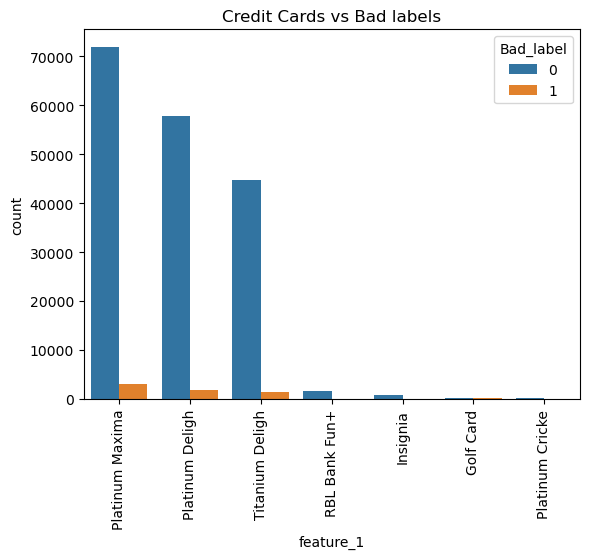

In [58]:
sns.countplot(x = 'feature_1', hue= data.Bad_label, data= data)  #assign countplot between feature_1 and Bad Labels
plt.title('Credit Cards vs Bad labels')    # assign title name 
plt.xticks(rotation = 90)    #increasing font of x-axis and rorating 90 degree 
plt.show()

#### Insights
* Most of the person having Platinum Maxima and Platinum Deligh Cards.
* Person who has Golf Card they having 50-50 chance of good or bad Credit Score (bad or good labels).
* Person who have RBL bank Fun+,Insignia and Platinum Cricke Cards they have perfect credit score

<Axes: xlabel='feature_3', ylabel='Count'>

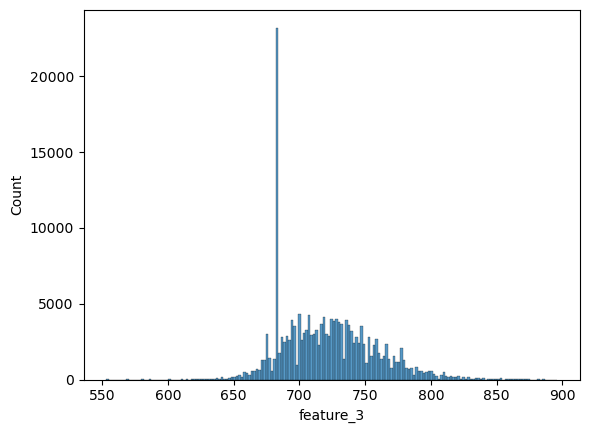

In [60]:
sns.histplot(data.feature_3)   # assign histplot for feature_3

#### Insights
* Most of the customers have good credit score

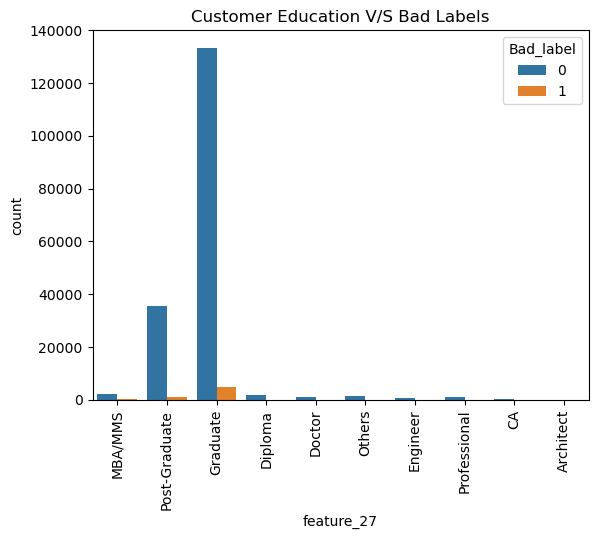

In [62]:
sns.countplot(x = 'feature_27', hue= data.Bad_label, data = data)  #assign countplot between feature_27 and Bad Labels
plt.title("Customer Education V/S Bad Labels")     # assign title name 
plt.xticks(rotation = 90)    #increasing font of x-axis and rorating 90 degree 
plt.show()

#### Insights
* Few chance of that customers who has completed Graduate, Post Graduate and MBA/MMS having Bad Credit score 

<function matplotlib.pyplot.show(close=None, block=None)>

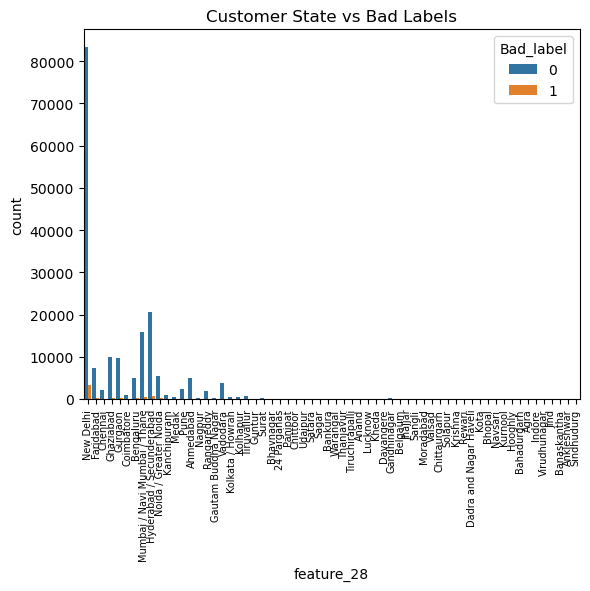

In [64]:
sns.countplot(x = 'feature_28', hue= data.Bad_label, data= data)  # assign countplot between feature_28 and Bad Labels
plt.title("Customer State vs Bad Labels")  # assign title name 
plt.xticks(rotation = 90, fontsize = 7)  #increasing font of x-axis and rorating 90 degree 
plt.show

#### Insights
* Most of the Customers belongs to New Delhi.

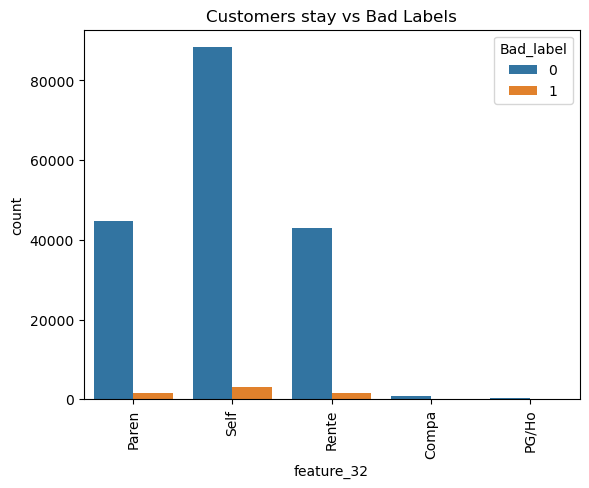

In [66]:
sns.countplot(x = 'feature_32',hue = data.Bad_label, data= data)   #assign countplot between feature_32 and Bad Labels
plt.title("Customers stay vs Bad Labels")     # assign title name of distributions
plt.xticks(rotation=90)   #increasing font of x-axis and rorating 90 degree 
plt.show()  # for showing graphs

#### Insights
* Most of the customers who has crdit cards they stay at their own house.

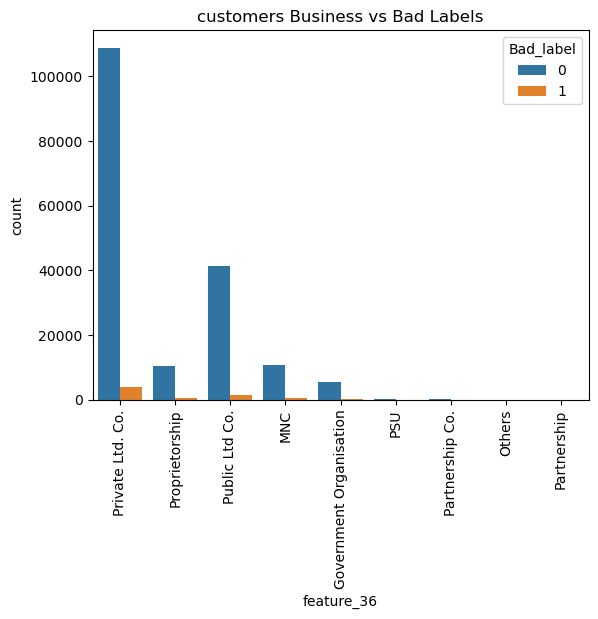

In [68]:
sns.countplot(x = 'feature_36',hue = data.Bad_label, data= data) #assign countplot between feature_36 and Bad Labels
plt.title("customers Business vs Bad Labels") # assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

#### Insights
* Most of the Customer having Credit Cards who belong from Private Ltd.Co.


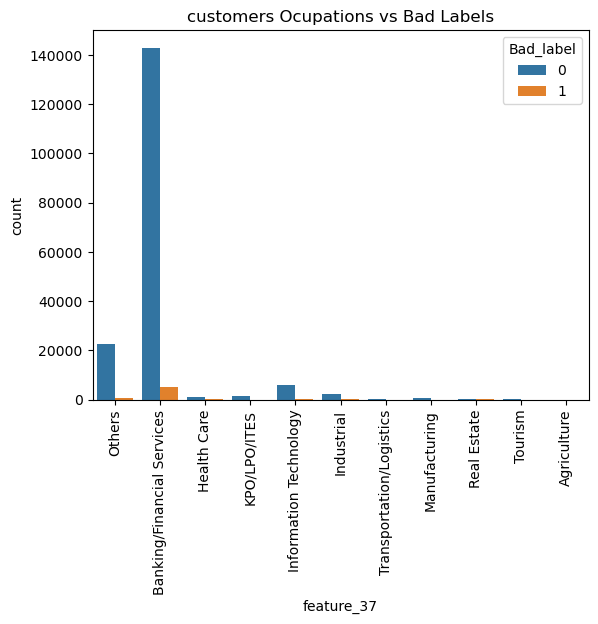

In [70]:
sns.countplot(x= 'feature_37',hue = data.Bad_label, data= data) #assign countplot between feature_37 and Bad Labels
plt.title("customers Ocupations vs Bad Labels") # assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

#### Insights
* Most chance of that Customers who doing job in Banking/Financial services they taking credit cards.

## Final Conclusions of Insights :-
* Most of the person having Platinum Maxima and Platinum Deligh Cards.
* Person who has Golf Card they having 50-50 chance of good or bad Credit Score (bad or good labels).
* Person who have RBL bank Fun+,Insignia and Platinum Cricke Cards they have perfect credit score.
* Most of the customers have good credit score.
* Few chance of that customers who has completed Post Graduate, Graduate and MBA/MMS their Credit score are Bad.
* Most of the Customers belong from New Delhi.
* Most of the Customer having Credit Cards who belong from Private Ltd.Co.
* Customers who started their bussiness in Partership they maintain their credit score.
* Most chance of that Customers who doing job in Banking/Financial services they taking credit cards.
* Most of the customers who has crdit cards they stay at their on home.

In [73]:
data

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900,0,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2013
1,12265,10,16201,10390,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
2,12265,10,41028,34420,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
3,15606,10,93473,0,Platinum Deligh,687,3,125000.0,PD1,12,SA35,S001,2,Post-Graduate,Faridabad,121003.0,2009,Self,1,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1,2.0,Faridabad,2,N,13,2009,13,39,121003.0,1,100000.0,13,R,1,2006
4,15606,6,20250,13500,Platinum Deligh,687,3,125000.0,PD1,12,SA35,S001,2,Post-Graduate,Faridabad,121003.0,2009,Self,1,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1,2.0,Faridabad,2,N,13,2009,13,39,121003.0,1,100000.0,13,R,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228,24228,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2007
186325,1611,10,19584,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2007
186326,1611,10,50844,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2006
186327,1611,10,35587,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2006


### Checking Outliers 

In [75]:
# getting that columns which type are integers

df = data.select_dtypes(include='int')

In [76]:
df

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_3,feature_4,feature_14,feature_26,feature_30,feature_34,feature_40,feature_44,feature_56,feature_63,feature_64,feature_65,feature_68,feature_71,Bad_label,opened_dt_year
0,12265,6,20900,0,683,3,12,0,2006,1,1,4,10,2006,10,157,1,13,1,2013
1,12265,10,16201,10390,683,3,12,0,2006,1,1,4,10,2006,10,157,1,13,1,2012
2,12265,10,41028,34420,683,3,12,0,2006,1,1,4,10,2006,10,157,1,13,1,2012
3,15606,10,93473,0,687,3,12,2,2009,1,1,2,13,2009,13,39,1,13,1,2006
4,15606,6,20250,13500,687,3,12,2,2009,1,1,2,13,2009,13,39,1,13,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228,24228,746,3,0,3,1995,1,0,11,2,1995,2,14,1,2,0,2007
186325,1611,10,19584,0,746,3,0,3,1995,1,0,11,2,1995,2,14,1,2,0,2007
186326,1611,10,50844,0,746,3,0,3,1995,1,0,11,2,1995,2,14,1,2,0,2006
186327,1611,10,35587,0,746,3,0,3,1995,1,0,11,2,1995,2,14,1,2,0,2006


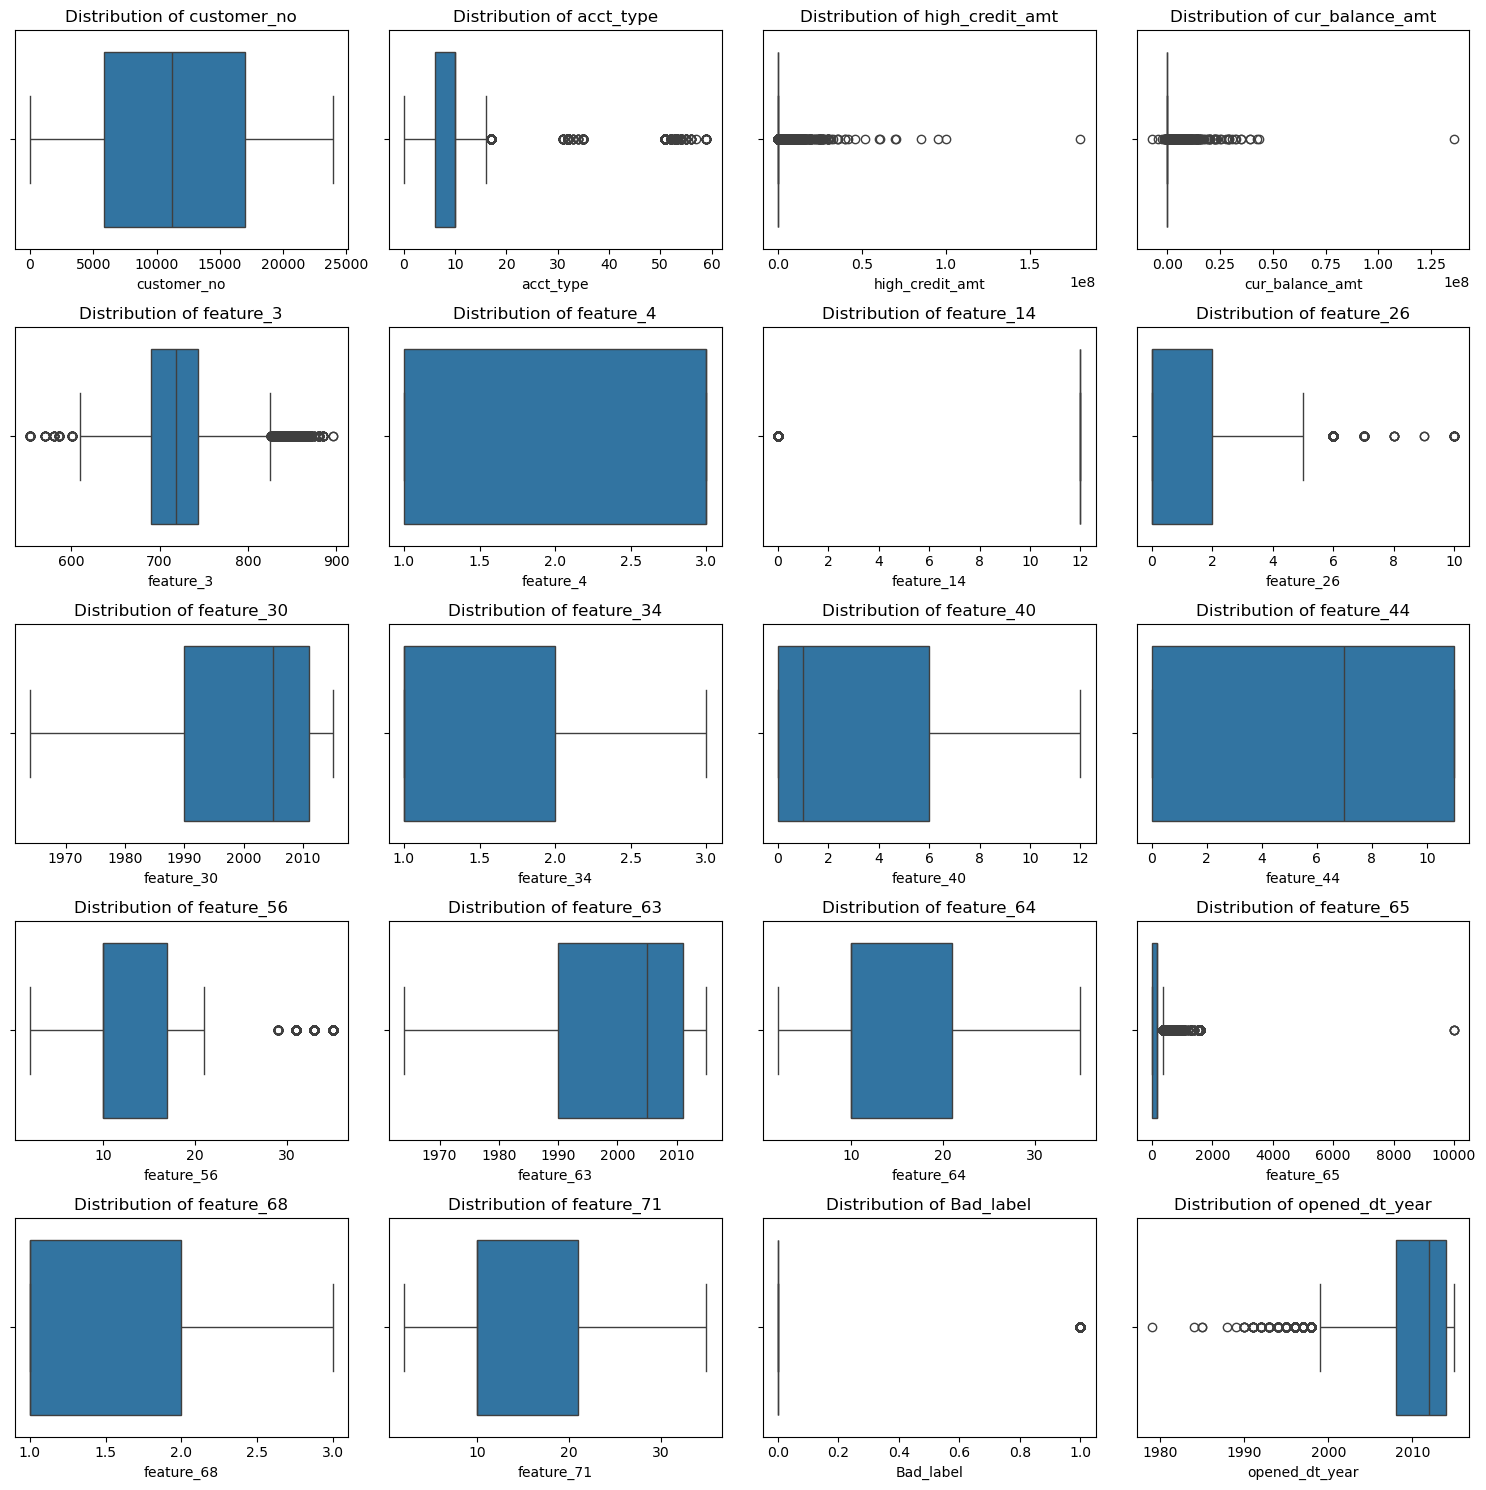

In [77]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(df, 1):   
    plt.subplot(5, 4, i)
    sns.boxplot(x=data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

In [78]:
df.columns

Index(['customer_no', 'acct_type', 'high_credit_amt', 'cur_balance_amt',
       'feature_3', 'feature_4', 'feature_14', 'feature_26', 'feature_30',
       'feature_34', 'feature_40', 'feature_44', 'feature_56', 'feature_63',
       'feature_64', 'feature_65', 'feature_68', 'feature_71', 'Bad_label',
       'opened_dt_year'],
      dtype='object')

In [79]:
outliers_col = ['acct_type', 'high_credit_amt', 'cur_balance_amt',
       'feature_3','feature_65', 'opened_dt_year']

In [80]:
for i in df[outliers_col]:
    Q1 = df[i].quantile(0.25)          # Calculate 1st quantile(0.25)
    Q3 = df[i].quantile(0.75)          # Calculate 3rd quantile(0.75)
    IQR = Q3-Q1                          # compute IQR
    upper_bound = Q3+1.5*IQR             # Define upper bound (anything below this is considered an outlier)
    lower_bound = Q1-1.5*IQR             # Define upper bound (anything below this is considered an outlier)
    
    data.loc[(df[i]<lower_bound) | (df[i]>upper_bound), i] = df[i].median()    # Replace values with the median of that column 

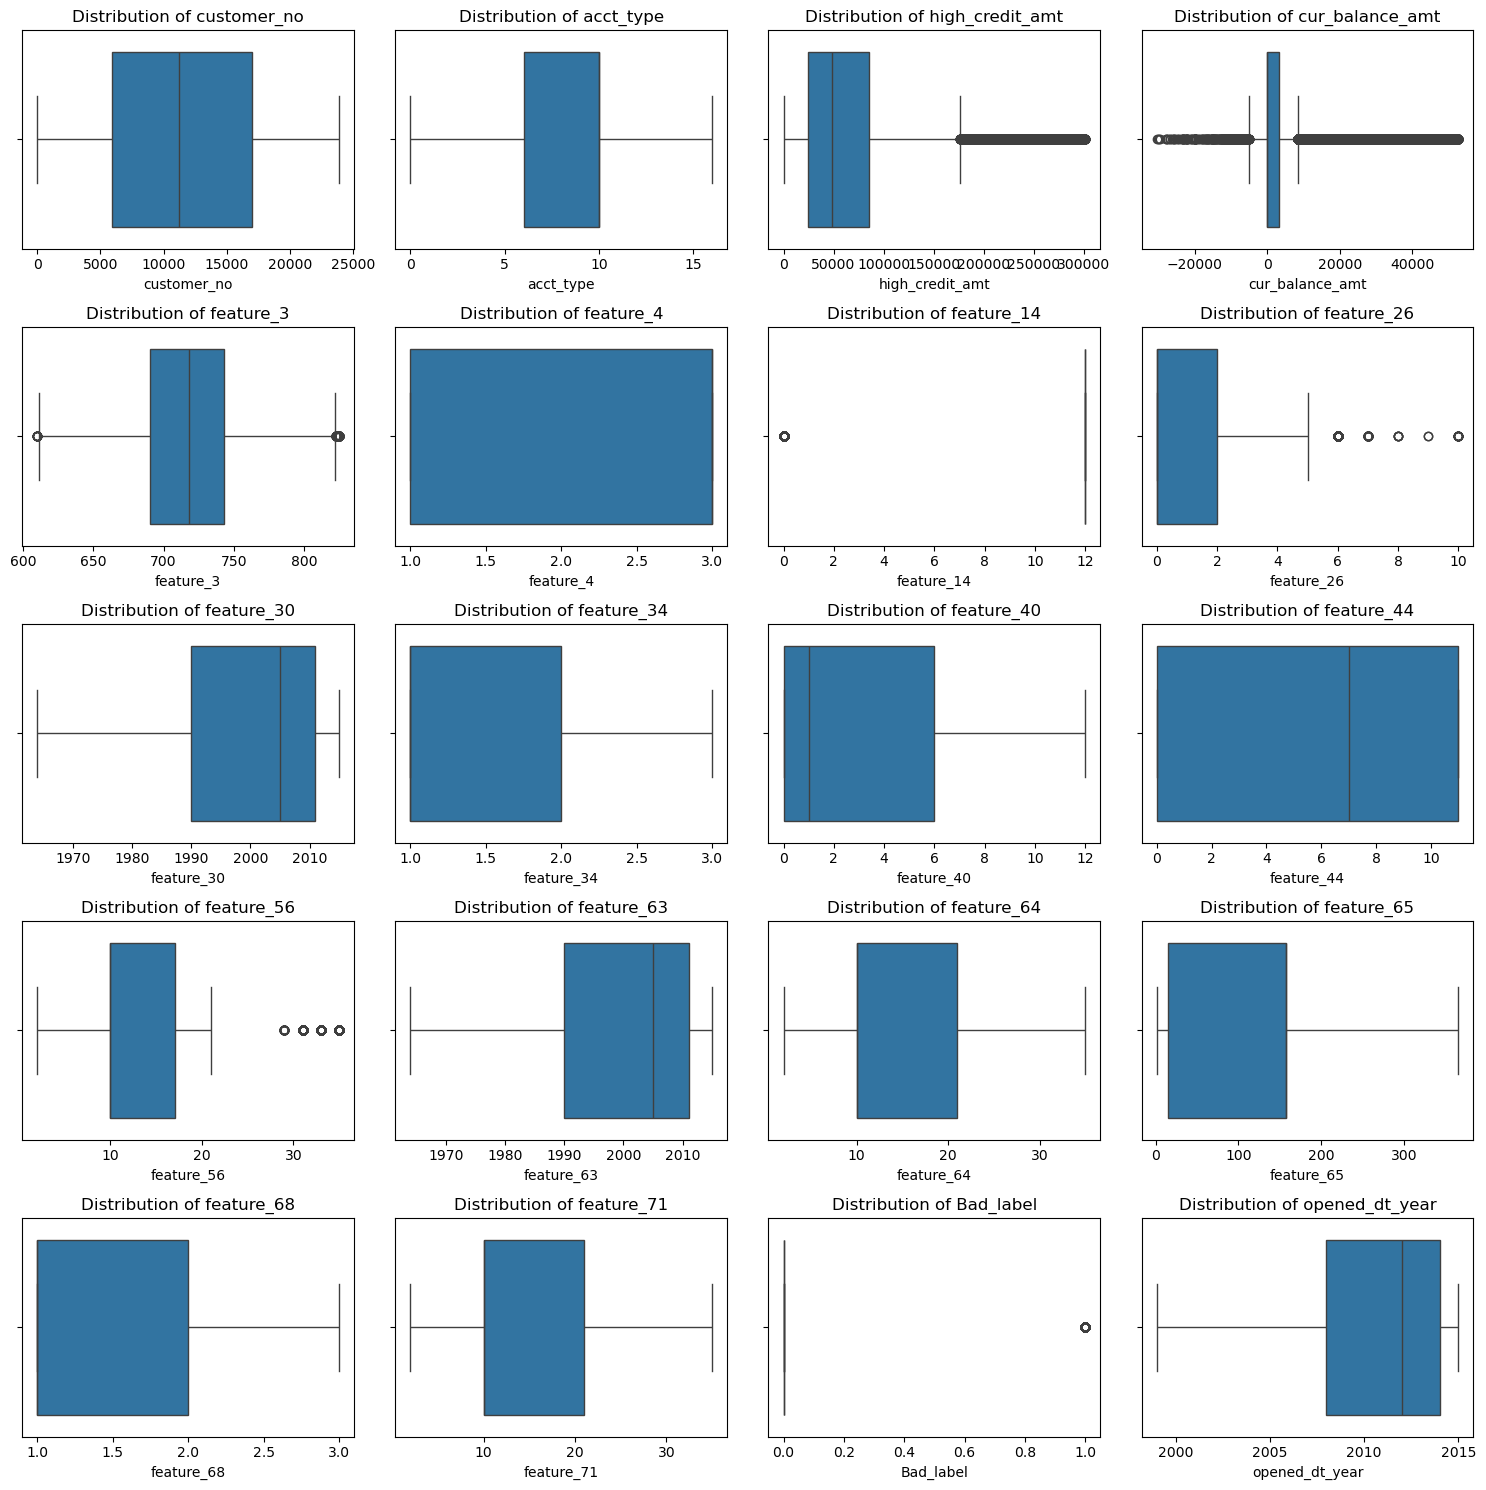

In [81]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(df, 1):   
    plt.subplot(5, 4, i)
    sns.boxplot(x=data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

## Encoding :-
* Here i'm going to apply LabelEncoder and manually Encoding because every data are Nominal Data.

In [83]:
data.head(3)

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900,0,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2013
1,12265,10,16201,10390,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
2,12265,10,41028,34420,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012


#### Feature_1
* which showing cards types

In [85]:
data.feature_1.value_counts()

feature_1
Platinum Maxima    74978
Platinum Deligh    59682
Titanium Deligh    46016
RBL Bank Fun+       1644
Insignia             865
Golf Card            403
Platinum Cricke      303
Name: count, dtype: int64

In [86]:
# manual encoding of total stops
data.feature_1 = data.feature_1.replace({"Platinum Cricke":0,"Golf Card":1,"Insignia":2,"RBL Bank Fun+":3,"Titanium Deligh":4,
                                        "Platinum Deligh":5,"Platinum Maxima":6})

#### Feature_27 

In [88]:
data.feature_27.value_counts()

feature_27
Graduate         138359
Post-Graduate     36573
MBA/MMS            2325
Diploma            1837
Others             1501
Doctor             1242
Professional       1070
Engineer            621
CA                  339
Architect            24
Name: count, dtype: int64

In [89]:
data.feature_27= data.feature_27.replace({"Architect":0,"CA":1,"Engineer":2,"Professional":3,"Doctor":4,"Others":5,
                                           "Diploma":6,"MBA/MMS":7,"Post-Graduate":8,"Graduate":9})

#### Feature_32

In [137]:
data.feature_32.value_counts()

feature_32
Banking/Financial Services    148232
Others                         23390
Information Technology          6013
Industrial                      2147
KPO/LPO/ITES                    1513
Health Care                     1209
Manufacturing                    522
Transportation/Logistics         408
Real Estate                      258
Tourism                          185
Agriculture                       14
Name: count, dtype: int64

In [139]:
data.feature_32 = data.feature_37.replace({"PG/Ho":0,"Compa":1,"Rente":2,"Paren":3,"Self":4})

#### Feature_36

In [94]:

data.feature_36.value_counts()

feature_36
Private Ltd. Co.           112743
Public Ltd Co.              42735
MNC                         11136
Proprietorship              11018
Government Organisation      5846
Partnership Co.               178
PSU                           176
Partnership                    54
Others                          5
Name: count, dtype: int64

In [95]:
data.feature_36 = data.feature_36.replace({"Others":0,"Partnership":1,"PSU":2,"Partnership Co.":3,"Government Organisation":4,
                                          "Proprietorship":5,"MNC":6,"Public Ltd Co.":7,"Private Ltd. Co.":8})

#### Feature_37

In [97]:
data.feature_37.value_counts()

feature_37
Banking/Financial Services    148232
Others                         23390
Information Technology          6013
Industrial                      2147
KPO/LPO/ITES                    1513
Health Care                     1209
Manufacturing                    522
Transportation/Logistics         408
Real Estate                      258
Tourism                          185
Agriculture                       14
Name: count, dtype: int64

In [98]:
data.feature_37 = data.feature_37.replace({"Agriculture":0,"Tourism":1,"Real Estate":2,"Transportation/Logistics":3,"Manufacturing":4,
                                          "Health Care":5,"KPO/LPO/ITES":6,"Industrial":7,"Information Technology":8,"Others":9,
                                          "Banking/Financial Services":10})

#### Feature_72

In [100]:
data.feature_72.value_counts()

feature_72
R    128537
O     55354
Name: count, dtype: int64

In [101]:
data.feature_72 = data.feature_72.replace({"O":0,"R":1})

#### Feature_50

In [103]:
data.feature_50.value_counts()

feature_50
Y    102546
N     81345
Name: count, dtype: int64

In [104]:
data.feature_50 = data.feature_50.replace({"N":0,"Y":1})

In [105]:
from sklearn.preprocessing import LabelEncoder  # assign label encoder for change categorical value into numerical
le = LabelEncoder()

In [106]:
data.feature_12 =le.fit_transform(data.feature_12)

In [107]:
data.feature_15 = le.fit_transform(data.feature_15)

In [108]:
data.feature_16 = le.fit_transform(data.feature_16)

In [109]:
data.feature_28 = le.fit_transform(data.feature_28)

In [110]:
data.feature_38 = le.fit_transform(data.feature_38)

In [111]:
# i'm going to drop feature_43 variable because feature_28 and feature_43 are giving us same information.

data.drop("feature_43",axis=1,inplace=True)

In [141]:
data

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900,0,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,9,1,35000.0,8,9,4509,1,4.0,4,0,10,2006,10,157,110059.0,1,35000.0,13,1,1,2013
1,12265,10,16201,10390,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,9,1,35000.0,8,9,4509,1,4.0,4,0,10,2006,10,157,110059.0,1,35000.0,13,1,1,2012
2,12265,10,41028,34420,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,9,1,35000.0,8,9,4509,1,4.0,4,0,10,2006,10,157,110059.0,1,35000.0,13,1,1,2012
3,15606,10,93473,0,5,687,3,125000.0,7,12,322,427,2,8,18,121003.0,2009,10,1,100000.0,8,10,2019,1,2.0,2,0,13,2009,13,39,121003.0,1,100000.0,13,1,1,2006
4,15606,6,20250,13500,5,687,3,125000.0,7,12,322,427,2,8,18,121003.0,2009,10,1,100000.0,8,10,2019,1,2.0,2,0,13,2009,13,39,121003.0,1,100000.0,13,1,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228,24228,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,10,1,45800.0,8,10,2629,0,11.0,11,0,2,1995,2,14,500017.0,1,45800.0,2,1,0,2007
186325,1611,10,19584,0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,10,1,45800.0,8,10,2629,0,11.0,11,0,2,1995,2,14,500017.0,1,45800.0,2,1,0,2007
186326,1611,10,50844,0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,10,1,45800.0,8,10,2629,0,11.0,11,0,2,1995,2,14,500017.0,1,45800.0,2,1,0,2006
186327,1611,10,35587,0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,10,1,45800.0,8,10,2629,0,11.0,11,0,2,1995,2,14,500017.0,1,45800.0,2,1,0,2006


## Feature Selection :-

In [145]:
data.corr()   # checking corelation

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
customer_no,1.000000,0.007215,-0.017125,-0.000663,0.294667,0.022132,-0.214869,-0.020007,-0.836574,0.384075,0.195424,-0.060657,-0.306869,0.016232,0.091399,-0.227594,-0.035481,-0.056465,0.003752,-0.062705,-0.041673,-0.056465,-0.004650,-0.010859,-0.027864,-0.027864,-0.090895,0.042654,-0.035481,0.056193,0.132565,-0.162787,0.003349,-0.062713,0.061212,-0.024418,-0.007948,0.029416
acct_type,0.007215,1.000000,-0.213009,0.175389,-0.017138,-0.043497,0.015763,0.022236,-0.000445,0.009730,0.012630,-0.008022,-0.011530,0.003438,0.001038,-0.010095,0.000941,-0.012704,-0.039239,-0.012887,0.005466,-0.012704,0.002418,0.027529,0.006462,0.006462,0.066694,-0.014300,0.000941,-0.001803,0.002112,0.009396,-0.039269,-0.012887,0.004664,-0.021040,-0.018254,-0.099490
high_credit_amt,-0.017125,-0.213009,1.000000,-0.063890,0.012819,0.037939,0.001015,0.066422,-0.002664,-0.016749,-0.017322,-0.003901,0.019221,-0.018292,-0.016828,0.018204,0.007976,-0.000897,0.025880,0.025840,0.000424,-0.000897,-0.003381,-0.011484,0.004031,0.004031,0.001388,0.018145,0.007976,0.011502,-0.017123,0.011669,0.025682,0.025836,0.013148,0.003020,0.001653,-0.025942
cur_balance_amt,-0.000663,0.175389,-0.063890,1.000000,0.013127,-0.126481,0.030016,-0.086822,0.012172,0.008394,0.010528,0.019830,-0.032781,0.009534,0.003782,-0.004764,0.036164,-0.008281,-0.035784,-0.024036,0.000250,-0.008281,0.009222,0.028673,-0.020614,-0.020614,0.020140,-0.027337,0.036164,-0.010895,0.012367,0.022065,-0.035754,-0.024035,-0.017486,-0.022830,0.013543,0.211767
feature_1,0.294667,-0.017138,0.012819,0.013127,1.000000,-0.012009,-0.042030,-0.038656,-0.261069,0.372548,0.013350,0.043843,-0.112638,-0.006507,0.003601,0.013878,0.002966,-0.002325,0.060584,0.009002,0.006041,-0.002325,0.005415,-0.024820,-0.045752,-0.045752,0.003376,-0.002812,0.002966,-0.002946,0.015866,0.008935,0.059146,0.008974,-0.012313,-0.003023,0.008832,0.029091
feature_3,0.022132,-0.043497,0.037939,-0.126481,-0.012009,1.000000,-0.206275,0.343844,-0.028692,0.021645,0.035167,-0.070910,0.036527,-0.005272,0.012830,-0.058328,-0.073419,0.030134,0.125096,0.035149,0.026517,0.030134,-0.025866,-0.106963,-0.022064,-0.022064,0.008846,0.070456,-0.073419,0.044440,-0.009538,-0.098964,0.126814,0.035179,0.043739,0.052856,-0.042586,-0.237205
feature_4,-0.214869,0.015763,0.001015,0.030016,-0.042030,-0.206275,1.000000,-0.066348,0.115123,0.094484,0.153794,-0.159523,0.217240,-0.070308,0.025362,-0.155481,0.028354,0.046598,-0.063019,0.015744,0.006178,0.046598,0.008872,-0.005718,0.035795,0.035795,0.105354,0.019518,0.028354,0.043110,0.074055,-0.097910,-0.064193,0.015724,0.036571,-0.028937,0.012696,0.010205
feature_7,-0.020007,0.022236,0.066422,-0.086822,-0.038656,0.343844,-0.066348,1.000000,-0.075191,-0.020288,-0.055413,-0.053703,0.079718,-0.002243,-0.023503,0.010429,-0.060146,0.029794,0.088941,0.095608,0.038779,0.029794,0.006308,-0.067519,0.007407,0.007407,0.214929,0.045331,-0.060146,0.028304,-0.048890,-0.020599,0.089005,0.095608,0.025879,0.041011,-0.059830,-0.233861
feature_12,-0.836574,-0.000445,-0.002664,0.012172,-0.261069,-0.028692,0.115123,-0.075191,1.000000,-0.420164,-0.140428,0.092972,0.127253,-0.002222,-0.089538,0.220102,0.055754,0.004347,-0.048859,0.031656,0.016937,0.004347,0.008113,0.059697,0.054482,0.054482,0.051504,-0.073320,0.055754,-0.084714,-0.105848,0.162648,-0.048931,0.031655,-0.089368,0.023258,-0.012057,0.027578
feature_14,0.384075,0.009730,-0.016749,0.008394,0.372548,0.021645,0.094484,-0.020288,-0.420164,1.000000,0.370356,-0.172837,-0.004556,0.062858,0.110203,-0.414507,-0.043192,0.017217,0.012143,-0.065598,0.006216,0.017217,-0.005726,-0.08409

<Axes: >

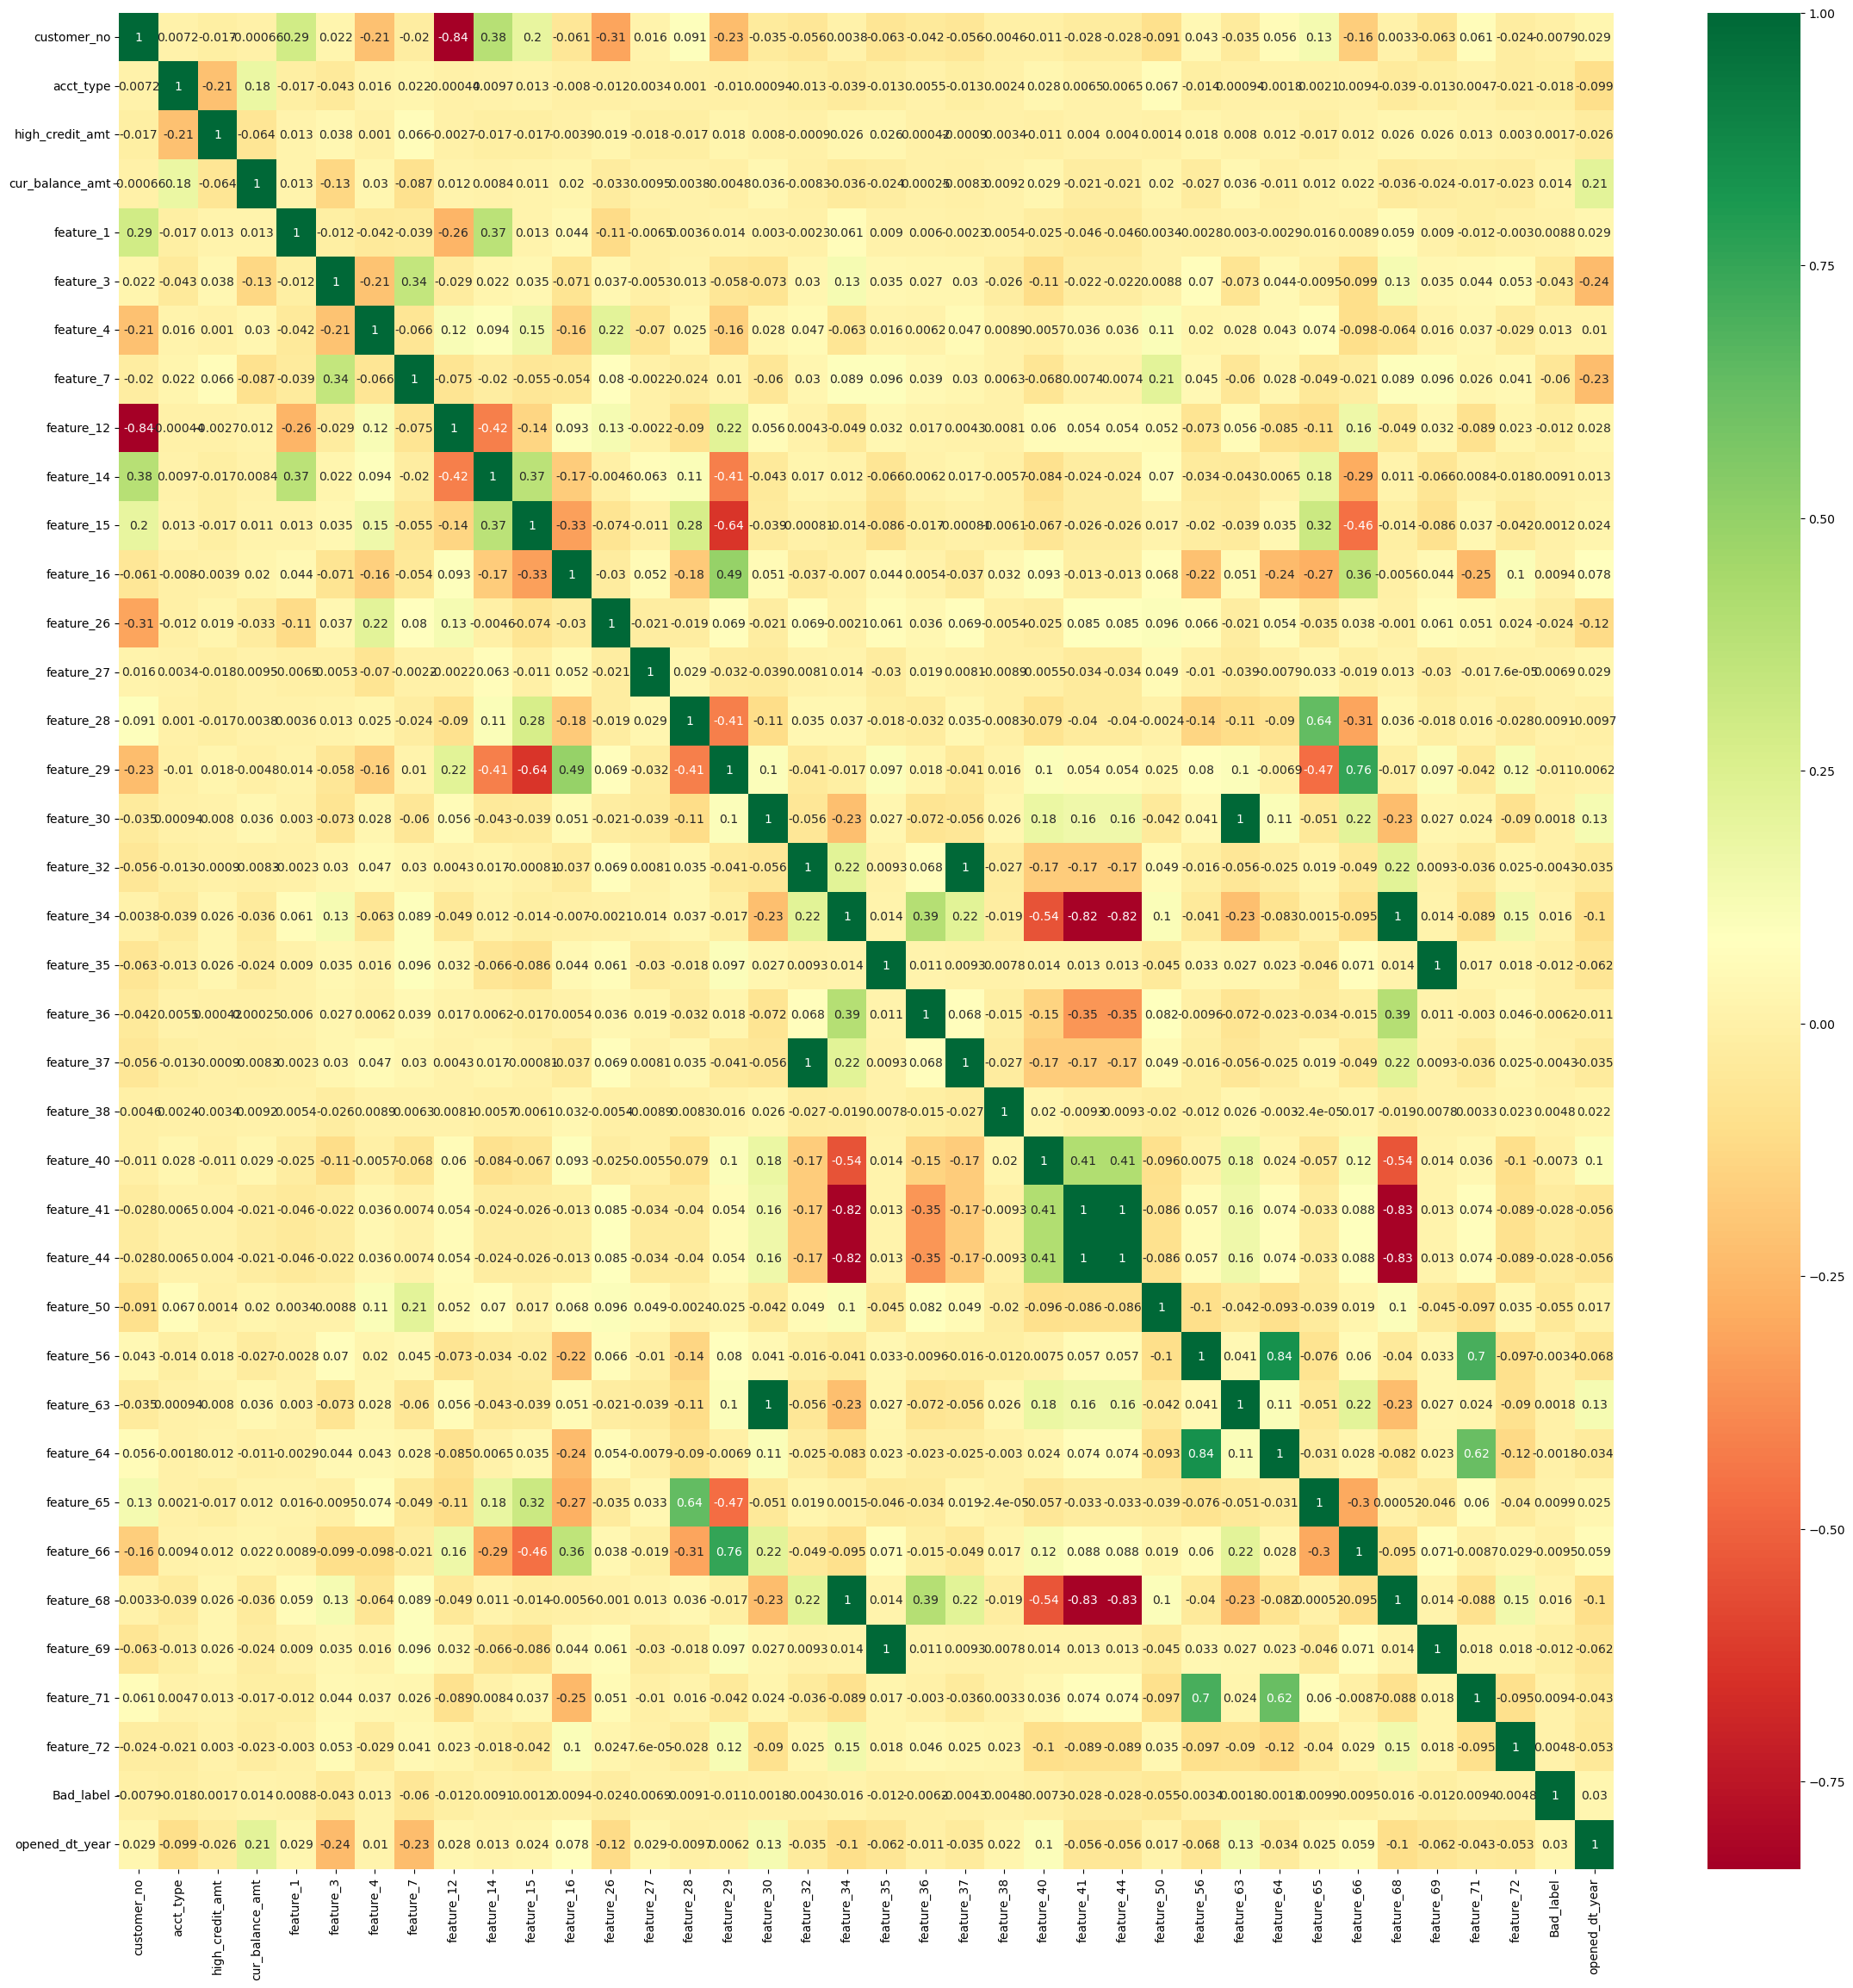

In [146]:
plt.figure(figsize=(28,28))   #increase plot size
sns.heatmap(data.corr(), annot= True, cmap= 'RdYlGn')   #it shows corelation between each and every columns by plot heatmap
#here we can see that every columns are connected to each other,So we can't remove any columns.

* Here, we can see that feature_30 highly corelated with feature_63
* feature_34 highly corelated with feature_68
* feature_35 highly corelated with feature_69
* feature_41 highly corelated with feature_44
* So, according to statistical way i'm going to drop one feature of them.

In [148]:
data.drop(["feature_63","feature_68","feature_69","feature_41"],axis=1,inplace=True) # droping columns

In [149]:
data

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_44,feature_50,feature_56,feature_64,feature_65,feature_66,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900,0,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,9,1,35000.0,8,9,4509,1,4,0,10,10,157,110059.0,13,1,1,2013
1,12265,10,16201,10390,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,9,1,35000.0,8,9,4509,1,4,0,10,10,157,110059.0,13,1,1,2012
2,12265,10,41028,34420,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,9,1,35000.0,8,9,4509,1,4,0,10,10,157,110059.0,13,1,1,2012
3,15606,10,93473,0,5,687,3,125000.0,7,12,322,427,2,8,18,121003.0,2009,10,1,100000.0,8,10,2019,1,2,0,13,13,39,121003.0,13,1,1,2006
4,15606,6,20250,13500,5,687,3,125000.0,7,12,322,427,2,8,18,121003.0,2009,10,1,100000.0,8,10,2019,1,2,0,13,13,39,121003.0,13,1,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228,24228,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,10,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,0,2007
186325,1611,10,19584,0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,10,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,0,2007
186326,1611,10,50844,0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,10,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,0,2006
186327,1611,10,35587,0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,10,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,0,2006


## Splitting the Data

In [151]:
# Now selecting independent variable and dependent variables

x = data.drop("Bad_label",axis=1)
x


,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_44,feature_50,feature_56,feature_64,feature_65,feature_66,feature_71,feature_72,opened_dt_year
0,12265,6,20900,0,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,9,1,35000.0,8,9,4509,1,4,0,10,10,157,110059.0,13,1,2013
1,12265,10,16201,10390,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,9,1,35000.0,8,9,4509,1,4,0,10,10,157,110059.0,13,1,2012
2,12265,10,41028,34420,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,9,1,35000.0,8,9,4509,1,4,0,10,10,157,110059.0,13,1,2012
3,15606,10,93473,0,5,687,3,125000.0,7,12,322,427,2,8,18,121003.0,2009,10,1,100000.0,8,10,2019,1,2,0,13,13,39,121003.0,13,1,2006
4,15606,6,20250,13500,5,687,3,125000.0,7,12,322,427,2,8,18,121003.0,2009,10,1,100000.0,8,10,2019,1,2,0,13,13,39,121003.0,13,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228,24228,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,10,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,2007
186325,1611,10,19584,0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,10,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,2007
186326,1611,10,50844,0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,10,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,2006
186327,1611,10,35587,0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,10,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,2006


In [152]:
y = data.Bad_label
y

0         1
1         1
2         1
3         1
4         1
         ..
186324    0
186325    0
186326    0
186327    0
186328    0
Name: Bad_label, Length: 183891, dtype: int64

In [153]:
#target variable are not balanced so we have to balanced this for avoiding overfitting and underfitting
data.Bad_label.value_counts()

Bad_label
0    177411
1      6480
Name: count, dtype: int64

## Model Creation :-

In [155]:
from sklearn.model_selection import train_test_split      # import train test split for spliting the data
# creating x_train,x_test,y_train,y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 43)

In [156]:
x_train

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_44,feature_50,feature_56,feature_64,feature_65,feature_66,feature_71,feature_72,opened_dt_year
94442,8814,7,142500,0,6,688,3,50000.0,10,0,354,171,2,8,12,600004.0,2005,7,1,50000.0,7,7,2740,3,11,1,31,31,13,600004.0,31,1,2011
99901,17838,6,33500,0,5,701,3,102000.0,7,12,301,133,0,8,42,110062.0,1990,10,1,40000.0,7,10,1756,7,10,1,10,10,157,110062.0,10,0,2012
166664,6173,10,113000,0,6,698,3,102000.0,10,12,218,297,2,8,39,400104.0,1997,10,2,450000.0,8,10,2629,0,0,1,21,21,15,400104.0,21,1,2011
56672,18594,10,202,0,5,682,2,66000.0,7,12,319,404,0,9,23,122001.0,1998,10,1,37301.0,7,10,2699,1,11,0,13,13,3,122001.0,10,1,2007
39390,14714,5,182500,0,6,712,1,180000.0,10,12,331,136,0,9,42,110027.0,1989,10,1,40000.0,6,10,5457,1,7,1,10,10,157,110027.0,13,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130612,11535,5,75000,0,6,676,1,85000.0,10,12,164,173,2,3,12,600083.0,2000,10,2,52000.0,8,10,2629,0,0,1,31,31,13,600083.0,31,0,2010
126694,12217,0,48900,0,6,780,1,150000.0,11,0,35,347,3,9,39,400092.0,2005,10,1,92256.0,7,10,841,6,11,0,21,21,15,400092.0,21,1,2011
41151,5332,1,48900,0,4,701,3,156000.0,14,0,218,297,0,4,39,410210.0,2009,10,1,40000.0,8,10,1549,4,11,1,21,21,157,410210.0,21,1,2011
152766,10267,10,44042,0,6,682,2,84000.0,10,12,301,134,0,9,23,122001.0,2012,10,1,33251.0,5,10,1177,4,11,0,13,5,157,847424.0,13,0,2013


In [157]:
y_train

94442     0
99901     0
166664    0
56672     0
39390     0
         ..
130612    0
126694    0
41151     0
152766    0
14259     0
Name: Bad_label, Length: 137918, dtype: int64

In [158]:
x_test

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_44,feature_50,feature_56,feature_64,feature_65,feature_66,feature_71,feature_72,opened_dt_year
168799,1437,10,175672,0,4,779,3,114000.0,14,12,301,130,2,9,21,201001.0,2011,10,1,45370.0,8,10,4497,9,8,0,33,33,83,247554.0,10,1,2014
77082,3750,6,8000,0,4,730,3,150000.0,14,0,261,202,3,3,42,110075.0,2000,10,1,140079.0,7,10,4653,1,11,0,10,10,157,110075.0,13,1,2008
35388,6272,13,44000,0,6,709,1,138000.0,10,0,135,200,1,9,42,110095.0,2008,10,1,1.0,8,10,1989,1,11,1,10,10,157,110095.0,10,1,2009
112792,11300,10,26574,0,6,727,1,234000.0,10,12,188,61,0,9,25,500003.0,1971,9,1,50000.0,7,9,2629,3,11,1,2,2,14,500003.0,2,1,2007
97882,4587,6,16200,4050,4,710,3,101000.0,14,0,324,205,0,9,42,110058.0,2014,10,1,65000.0,7,10,3678,4,8,0,10,10,157,110058.0,10,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98811,2011,10,224,-76,4,663,3,85000.0,14,12,301,134,1,8,42,110018.0,2011,10,1,1.0,8,10,632,2,11,1,10,10,157,110018.0,10,0,2014
21543,2779,1,81559,0,4,745,3,41000.0,14,12,301,124,3,8,42,110059.0,1995,10,1,26751.0,4,10,2479,0,11,0,10,10,157,110059.0,10,1,2013
115233,22928,10,16499,3520,5,682,2,68000.0,7,12,301,140,0,9,42,110092.0,2009,10,1,37544.0,8,10,2863,1,6,0,10,33,157,221712.0,13,0,2013
7767,13264,10,48773,14002,6,706,1,102000.0,10,12,190,509,0,9,25,500018.0,1983,9,1,28500.0,8,9,4746,1,5,1,2,2,14,500018.0,2,1,2014


In [159]:
y_test

168799    0
77082     0
35388     0
112792    0
97882     0
         ..
98811     0
21543     0
115233    0
7767      0
162232    0
Name: Bad_label, Length: 45973, dtype: int64

## Data Balancing :-

In [161]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [162]:
x_smote, y_smote = sm.fit_resample(x_train, y_train)

In [163]:
from collections import Counter  # checking data balanced or not
print(Counter(y_train))
print(Counter(y_smote))

Counter({0: 133054, 1: 4864})
Counter({0: 133054, 1: 133054})


## Model Selection :-

### Logistic Regression Model

In [166]:
from sklearn.linear_model import LogisticRegression   # assign Logistic regression
lr = LogisticRegression()
lr.fit(x_smote, y_smote)   # fit the model 

LogisticRegression()

### Decision Tree Classifier

In [168]:
from sklearn.tree import DecisionTreeClassifier   # assign decision tree classifier algorithmn
dt = DecisionTreeClassifier()
dt.fit(x_smote, y_smote)      # fit the model

DecisionTreeClassifier()

### Random Forest Classifier 

In [170]:
from sklearn.ensemble import RandomForestClassifier    # assign Random forest classifier algorithmn
rf = RandomForestClassifier()
rf.fit(x_smote, y_smote)     # fit the model

RandomForestClassifier()

### XGBClassifier

In [172]:
import xgboost as xg            #importing xgboost with alias name xg
from xgboost import XGBClassifier   #calling XGBRegressor
xgb_r = xg.XGBClassifier(            #assign in variable
    n_estimators = 500, seed = 123)
xgb_r.fit(x_smote, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

### MLPClassifier - ANN

In [174]:
from sklearn.neural_network import MLPClassifier     # assign MLPClassifier algorithmn
mlp = MLPClassifier(hidden_layer_sizes= (50,25,2),   # no. of hidden layers(3) 
                   learning_rate_init= 0.001, 
                   max_iter= 150, random_state=78)    # model object creation max_iter=Stopping parameter
mlp.fit(x_smote, y_smote)

MLPClassifier(hidden_layer_sizes=(50, 25, 2), max_iter=150, random_state=78)

### SVM Classifier

In [176]:
from sklearn.svm import SVC    #importing SVC class from sklearn.svm module in the scikit-learn library

In [177]:
svc = SVC(class_weight= 'balanced', random_state = 43)
svc

SVC(class_weight='balanced', random_state=43)

In [ ]:
svc.fit(x_smote, y_smote)      # fit SVC object to 'balanced data'

### K-Nearset Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier    #import KNeighboursClassifier model from sklearn.neighbors module of scikit-learn library
knn = KNeighborsClassifier()
knn
knn.fit(x_smote, y_smote)

### Bagging 

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagg = BaggingClassifier(n_estimators = 250, random_state = 42)
bagg

In [ ]:
bagg.fit(x_smote, y_smote)

## Model Evaluation :-

In [ ]:
# assign evaluation mer=trices for checking the performance 
from sklearn.metrics import  accuracy_score, f1_score, classification_report, confusion_matrix

### Logistic Regression Model Evaluation


In [ ]:
y_pred = lr.predict(x_test)  # predict the model
y_pred 

In [ ]:
acc1 = accuracy_score(y_test, y_pred)
acc1

In [ ]:
f1 = f1_score(y_test,y_pred, average="weighted") # checking f1 score
f1

In [ ]:
confusion_matrix(y_test, y_pred) # checking confusion metrix


In [ ]:
print(classification_report(y_test, y_pred)) # checking classification report of model

### Decision Tree Classifier Model Evaluation

In [ ]:
y_pred = dt.predict(x_test)
y_pred

In [ ]:
acc2 = accuracy_score(y_test, y_pred)
acc2

In [ ]:
f1_2 = f1_score(y_test, y_pred)
f1_2

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)  

### Random Forest Classifier MOdel Evaluation


In [ ]:
y_pred = rf.predict(x_test)
y_pred

In [ ]:
acc3 = accuracy_score(y_test, y_pred)
acc3

In [ ]:
f1_3 = f1_score(y_test, y_pred)
f1_3

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

### XGBClassifier Model Evaluationn 

In [ ]:
y_pred = xgb_r.predict(x_test)
y_pred

In [ ]:
acc4 = accuracy_score(y_test, y_pred)
acc4

In [ ]:
f1_4 = f1_score(y_test, y_pred)
f1_4

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

### ANN- MLPClassifier MOdel Evaluation 

In [ ]:
y_pred = mlp.predict(x_test)
y_pred

In [ ]:
acc5 = accuracy_score(y_test, y_pred)
acc5 

In [ ]:
f1_5 = f1_score(y_test, y_pred)
f1_5

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

## SVM Classifier


In [ ]:
y_pred = svc.predict(x_test)
y_pred

In [ ]:
acc6 = accuracy_score(y_test, y_pred)
acc6

In [ ]:
f1_6 = f1_score(y_test, y_pred)
f1_6

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_red))

### K-Nearest NEighbor

In [ ]:
y_pred = knn.predict(x_test)
y_pred

In [ ]:
acc7 = accuracy_score(y_test, y_pred)
acc7

In [ ]:
f1_7 = f1_score(y_test, y_pred)
f1_7

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

### Bagging 

In [ ]:
y_pred = bagg.predict(x_test)
y_pred

In [ ]:
acc8 = accuracy_score(y_test, y_pred)
acc8

In [ ]:
f1_8 = f1_score(y_test, y_pred)
f1_8

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

## Model Comparision Report 

In [ ]:
# creating model comparision report using dataframe 
score = pd.DataFrame({"Model": ["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","XGBoost Classifier","ANN_MLPClassifier", "SVM Classifier"],
                     "Accuacry": [acc1*100, acc2*100, acc3*100, acc4*100, acc5*100, acc6*100, acc7*100, acc8*100],
                     "F1_score": [f1_1,f1_2,f1_3,f1_4,f1_5, f1_6, f1_7, f1_8]})

In [ ]:
score  

## Conclusion 
I have used 5 Algorithmns which name are LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,XG Boost and ANN_MLPClassifier for training the model. I got **99.40** percentage in **Random Forest Classifier** which is maximum than all Algorithmn and its working Mindblowing and model predict perfect result. So,I am perfering Random Forest Classifier for checking the **GoodCredit Score of customers**.

## Data Analysis Report 
This project focused on developing a machine learning model to classify customers based on their Bank GoodCredit Score. The dataset was composed of three tables: Customer Enquiries, Customer Demographics, and Customer Accounts. The workflow was divided into several phases: exploratory data analysis, preprocessing, model building and training, and performance evaluation.

* **Exploratory Data Analysis (EDA)**: In the initial analysis, we examined the dataset to understand its structure and characteristics. One major observation was the imbalance in the target labels, which could affect model performance. Additionally, the dataset contained a large number of missing values, with some columns having over 40% null entries. Several features were also stored with incorrect data types, and many categorical attributes required transformation into numerical form.

* **Data Preprocessing**: To prepare the data, missing values were handled by imputing or removing them, and columns with more than 40% missing data were discarded. Features with very little variance were also removed to minimize risks of overfitting or underfitting. Data types were corrected, and categorical variables were converted into numerical ones using Label Encoding as well as manual encoding techniques. Unnecessary variables were also dropped to simplify the dataset.

* **Model Development**: We implemented and trained multiple machine learning algorithms, including Logistic Regression, Decision Tree Classifier, Random Forest Classifier, XGBoost, and an Artificial Neural Network (MLPClassifier). These models were trained on the processed data and assessed using metrics such as accuracy, precision, recall, and F1-score. Since the dataset was imbalanced, special emphasis was placed on precision and recall to ensure the reliability of the model in identifying true positives.

## Report on Challenges faced
* **Huge amount of data** : this dataset contains 3 tables after merging important tables rows goes to 1.9 lakhs and columns goes to 105 which are huge because of this we faced more problem while doing work it was take more time for run any cells.

* **Choosing columns for training model** : this dataset has 105 columns and most of the columns having no variety in their values it was difficult to select important columns.

* **Hiding columns names** : this dataset has customers demographices tables which columns name are hiding for security purpose.it was difficult to understand what columns are saying because of this it was difficult to select important columns.

* **No EDA** : we can't do EDA in this dataset because 80% columns names are hide for security purposes and it's difficult to get insights from data.because of this we got problem while doing EDA.